In [1]:
# run this to shorten the data import from the files
path_data = '/home/nero/Documents/Estudos/DataCamp/Python/Introduction_to_Deep_Learning_with_Keras/datasets/'
import pandas as pd
import numpy as np

In [2]:
features = np.load(path_data + 'digits_pixels.npy')
targets = np.load(path_data + 'digits_target.npy')
features.shape, targets.shape
from tensorflow.keras.utils import to_categorical

targets = to_categorical(targets)
features.shape, targets.shape

2023-06-23 14:42:24.898514: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-23 14:42:25.056665: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-23 14:42:25.058450: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-23 14:42:26.619420: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


((1797, 64), (1797, 10))

In [3]:
from sklearn.model_selection import  train_test_split as tts

X_train, X_test, y_train, y_test = tts(features, targets, test_size = 0.3)

In [4]:
X_train.shape, y_train.shape

((1257, 64), (1257, 10))

In [5]:
X_test.shape, y_test.shape

((540, 64), (540, 10))

In [6]:
from tensorflow.keras.models import  Sequential
from tensorflow.keras.layers import Dense

In [7]:
# exercise 01

"""
Learning the digits

You're going to build a model on the digits dataset, a sample dataset that comes pre-loaded with scikit learn. The digits dataset consist of 8x8 pixel handwritten digits from 0 to 9:
You want to distinguish between each of the 10 possible digits given an image, so we are dealing with multi-class classification.

The dataset has already been partitioned into X_train, y_train, X_test, and y_test, using 30% of the data as testing data. The labels are already one-hot encoded vectors, so you don't need to use Keras to_categorical() function.

Let's build this new model!
"""

# Instructions

"""

    Add a Dense layer of 16 neurons with relu activation and an input_shape that takes the total number of pixels of the 8x8 digit image.
    Add a Dense layer with 10 outputs and softmax activation.
    Compile your model with adam, categorical_crossentropy, and accuracy metrics.
    Make sure your model works by predicting on X_train.

"""

# solution

# Instantiate a Sequential model
model = Sequential()

# Input and hidden layer with input_shape, 16 neurons, and relu 
model.add(Dense(16, input_shape = (64,), activation = 'relu'))

# Output layer with 10 neurons (one per digit) and softmax
model.add(Dense(10, activation='softmax'))

# Compile your model
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Test if your model is well assembled by predicting before training
print(model.predict(X_test))

#----------------------------------#

# Conclusion

"""
Great! Predicting on training data inputs before training can help you quickly check that your model works as expected.
"""

2023-06-23 14:42:29.409964: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2023-06-23 14:42:29.410012: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:168] retrieving CUDA diagnostic information for host: nero
2023-06-23 14:42:29.410022: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:175] hostname: nero
2023-06-23 14:42:29.410553: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:199] libcuda reported version is: 535.54.3
2023-06-23 14:42:29.410594: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:203] kernel reported version is: 535.54.3
2023-06-23 14:42:29.410602: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:309] kernel version seems to match DSO: 535.54.3


17/17 [==============================] - 0s 2ms/step
[[4.1814714e-05 1.1490938e-06 2.5362852e-01 ... 7.4190348e-02
  6.8654253e-06 8.5405509e-06]
 [3.7473008e-10 2.2900580e-05 6.0927004e-02 ... 4.3259397e-01
  4.3254293e-08 1.3598967e-08]
 [5.4143213e-13 2.8451739e-06 9.4972201e-02 ... 7.1988130e-01
  2.9317085e-05 1.0441650e-09]
 ...
 [3.3235199e-08 1.5681166e-04 1.8724699e-01 ... 4.0330955e-01
  1.0722771e-06 8.4917384e-10]
 [4.6569289e-12 6.7923693e-06 6.0363494e-02 ... 6.2135357e-01
  9.7014197e-07 2.2489480e-06]
 [1.0590834e-16 1.1432214e-09 1.5652969e-01 ... 8.3387935e-01
  1.7973309e-11 4.0411381e-09]]


'\nGreat! Predicting on training data inputs before training can help you quickly check that your model works as expected.\n'

In [8]:
import matplotlib.pyplot as plt

def plot_loss(loss,val_loss):
  plt.figure()
  plt.plot(loss)
  plt.plot(val_loss)
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper right')
  plt.show()


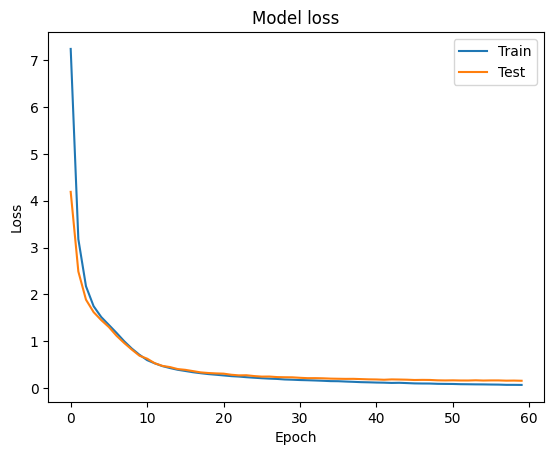

"\nAwesome choice! This graph doesn't show overfitting but convergence. It looks like your model has learned all it could from the data and it no longer improves. The test loss, although higher than the training loss, is not getting worse, so we aren't overfitting to the training data.\n"

In [9]:
# exercise 02

"""
Is the model overfitting?

Let's train the model you just built and plot its learning curve to check out if it's overfitting! You can make use of the loaded function plot_loss() to plot training loss against validation loss, you can get both from the history callback.

If you want to inspect the plot_loss() function code, paste this in the console: show_code(plot_loss)
"""

# Instructions

"""

    Train your model for 60 epochs, using X_test and y_test as validation data.
    Use plot_loss() passing loss and val_loss as extracted from the history attribute of the h_callback object.
---

"""

# solution

# Train your model for 60 epochs, using X_test and y_test as validation data
h_callback = model.fit(X_train, y_train, epochs = 60, validation_data = (X_test, y_test), verbose=0)

# Extract from the h_callback object loss and val_loss to plot the learning curve
plot_loss(h_callback.history['loss'], h_callback.history['val_loss'])

#----------------------------------#

# Conclusion

"""
Awesome choice! This graph doesn't show overfitting but convergence. It looks like your model has learned all it could from the data and it no longer improves. The test loss, although higher than the training loss, is not getting worse, so we aren't overfitting to the training data.
"""

In [10]:
initial_weights = model.get_weights()
train_accs = []
test_accs = []
training_sizes = np.array([ 125,  502,  879, 1255])

In [11]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='loss', patience=3)

In [12]:
def plot_results(train_accs,test_accs):
  plt.plot(training_sizes, train_accs, 'o-', label="Training Accuracy")
  plt.plot(training_sizes, test_accs, 'o-', label="Test Accuracy")
  plt.title('Accuracy vs Number of training samples')
  plt.xlabel('# of training samples')
  plt.ylabel('Accuracy')
  plt.legend(loc="best")
  plt.show()

Epoch 1/50
4/4 [==============================] - 0s 4ms/step - loss: 0.0411 - accuracy: 0.9920
Epoch 2/50
4/4 [==============================] - 0s 5ms/step - loss: 0.0393 - accuracy: 0.9920
Epoch 3/50
4/4 [==============================] - 0s 4ms/step - loss: 0.0382 - accuracy: 0.9920
Epoch 4/50
4/4 [==============================] - 0s 4ms/step - loss: 0.0371 - accuracy: 0.9920
Epoch 5/50
4/4 [==============================] - 0s 5ms/step - loss: 0.0356 - accuracy: 1.0000
Epoch 6/50
4/4 [==============================] - 0s 4ms/step - loss: 0.0339 - accuracy: 1.0000
Epoch 7/50
4/4 [==============================] - 0s 4ms/step - loss: 0.0322 - accuracy: 1.0000
Epoch 8/50
4/4 [==============================] - 0s 5ms/step - loss: 0.0309 - accuracy: 1.0000
Epoch 9/50
4/4 [==============================] - 0s 4ms/step - loss: 0.0295 - accuracy: 1.0000
Epoch 10/50
4/4 [==============================] - 0s 5ms/step - loss: 0.0288 - accuracy: 1.0000
Epoch 11/50
4/4 [======================

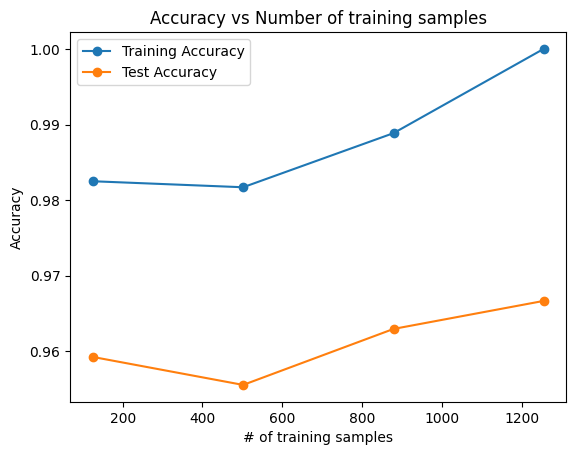

"\nGood job, that was a lot of code to understand! The results shows that your model would not benefit a lot from more training data, since the test set accuracy is already starting to flatten. It's time to look at activation funtions!\n"

In [13]:
# exercise 03

"""
Do we need more data?

It's time to check whether the digits dataset model you built benefits from more training examples!

In order to keep code to a minimum, various things are already initialized and ready to use:

    The model you just built.
    X_train,y_train,X_test, and y_test.
    The initial_weights of your model, saved after using model.get_weights().
    A pre-defined list of training sizes: training_sizes.
    A pre-defined early stopping callback monitoring loss: early_stop.
    Two empty lists to store the evaluation results: train_accs and test_accs.

Train your model on the different training sizes and evaluate the results on X_test. End by plotting the results with plot_results().

The full code for this exercise can be found on the slides!
"""

# Instructions

"""

    Get a fraction of the training data determined by the size we are currently evaluating in the loop.
    Set the model weights to the initial_weights with set_weights() and train your model on the fraction of training data using early_stop as a callback.
    Evaluate and store the accuracy for the training fraction and the test set.
    Call plot_results() passing in the training and test accuracies for each training size.

"""

# solution

for size in training_sizes:
  	# Get a fraction of training data (we only care about the training data)
    X_train_frac, y_train_frac = X_train[:size], y_train[:size]

    # Reset the model to the initial weights and train it on the new training data fraction
    model.set_weights(initial_weights)
    model.fit(X_train_frac, y_train_frac, epochs = 50, callbacks = [early_stop])

    # Evaluate and store both: the training data fraction and the complete test set results
    train_accs.append(model.evaluate(X_train, y_train)[1])
    test_accs.append(model.evaluate(X_test, y_test)[1])
    
# Plot train vs test accuracies
plot_results(train_accs, test_accs)

#----------------------------------#

# Conclusion

"""
Good job, that was a lot of code to understand! The results shows that your model would not benefit a lot from more training data, since the test set accuracy is already starting to flatten. It's time to look at activation funtions!
"""

In [14]:
# Instantiate a Sequential model
model = Sequential()

# Add a hidden layer of 64 neurons and a 20 neuron's input
model.add(Dense(64, input_shape = (20,), activation = 'relu'))

# Add an output layer of 3 neurons with sigmoid activation
model.add(Dense(3, activation = 'sigmoid'))

# Compile your model with binary crossentropy loss
model.compile(optimizer='adam',
           loss = 'binary_crossentropy',
           metrics=['accuracy'])

In [15]:
# Set a random seed
np.random.seed(1)
# Return a new model with the given activation
def get_model(act_function):
    model = Sequential()
    model.add(Dense(4, input_shape=(20,), activation=act_function))
    model.add(Dense(3, activation='sigmoid'))
    model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])
    return model

In [16]:
from sklearn.model_selection import train_test_split as tts

In [17]:
sensor_data = pd.read_csv(path_data + 'irrigation_machine.csv').drop(columns = ['Unnamed: 0'])

sensor_data.head()

,sensor_0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,parcel_0,parcel_1,parcel_2
0,1.0,2.0,1.0,7.0,0.0,1.0,1.0,4.0,0.0,3.0,...,8.0,1.0,0.0,2.0,1.0,9.0,2.0,0,1,0
1,5.0,1.0,3.0,5.0,2.0,2.0,1.0,2.0,3.0,1.0,...,4.0,5.0,5.0,2.0,2.0,2.0,7.0,0,0,0
2,3.0,1.0,4.0,3.0,4.0,0.0,1.0,6.0,0.0,2.0,...,3.0,3.0,1.0,0.0,3.0,1.0,0.0,1,1,0
3,2.0,2.0,4.0,3.0,5.0,0.0,3.0,2.0,2.0,5.0,...,4.0,1.0,1.0,4.0,1.0,3.0,2.0,0,0,0
4,4.0,3.0,3.0,2.0,5.0,1.0,3.0,1.0,1.0,2.0,...,1.0,3.0,2.0,2.0,1.0,1.0,0.0,1,1,0


In [18]:
X_train, X_test, y_train, y_test = tts(sensor_data.iloc[:,:-3], sensor_data.iloc[:,-3:], test_size=0.3)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1400, 20), (1400, 3), (600, 20), (600, 3))

In [19]:
# func used in exercise
'''
def get_model(act_function):
  if act_function not in ['relu', 'leaky_relu', 'sigmoid', 'tanh']:
    raise ValueError('Make sure your activation functions are named correctly!')
  print("Finishing with",act_function,"...")
  return ModelWrapper(act_function)
  '''

'\ndef get_model(act_function):\n  if act_function not in [\'relu\', \'leaky_relu\', \'sigmoid\', \'tanh\']:\n    raise ValueError(\'Make sure your activation functions are named correctly!\')\n  print("Finishing with",act_function,"...")\n  return ModelWrapper(act_function)\n  '

In [20]:
# exercise 04

"""
Comparing activation functions

Comparing activation functions involves a bit of coding, but nothing you can't do!

You will try out different activation functions on the multi-label model you built for your farm irrigation machine in chapter 2. The function get_model('relu') returns a copy of this model and applies the 'relu' activation function to its hidden layer.

You will loop through several activation functions, generate a new model for each and train it. By storing the history callback in a dictionary you will be able to visualize which activation function performed best in the next exercise!

X_train, y_train, X_test, y_test are ready for you to use when training your models.
"""

# Instructions

"""

    Fill up the activation functions array with relu,leaky_relu, sigmoid, and tanh.
    Get a new model for each iteration with get_model() passing the current activation function as a parameter.
    Fit your model providing the train and validation_data, use 20 epochs and set verbose to 0.

"""

# solution

# Activation functions to try
activations = ['relu', 'leaky_relu', 'sigmoid', 'tanh']

# Loop over the activation functions
activation_results = {}

for act in activations:
  # Get a new model with the current activation
  model = get_model(act)
  # Fit the model and store the history results
  h_callback = model.fit(X_train, y_train, epochs = 100, verbose = 0, validation_data = (X_test, y_test))
  activation_results[act] = h_callback

#----------------------------------#

# Conclusion

"""
Awesome job! You've trained 4 models, each with a different activation function, let's see how well they performed!
"""

"\nAwesome job! You've trained 4 models, each with a different activation function, let's see how well they performed!\n"

In [21]:
# create the dictionaries val_loss_per_function and val_acc_per_function

val_loss_per_function = {}

val_acc_per_function = {}

activations = ['relu', 'leaky_relu', 'sigmoid', 'tanh']

for act in activations:
  val_loss_per_function[act] = activation_results[act].history['val_loss']
  val_acc_per_function[act] = activation_results[act].history['val_accuracy']
  

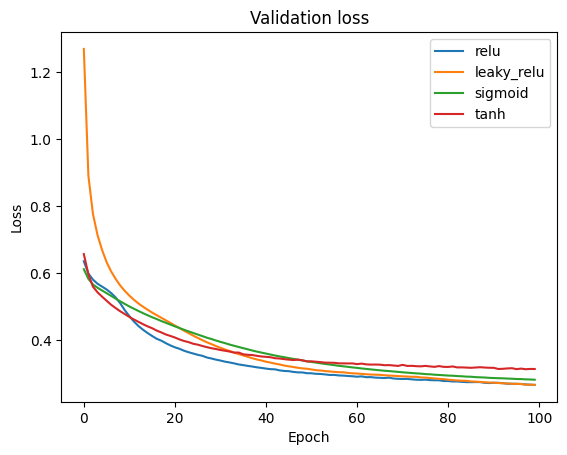

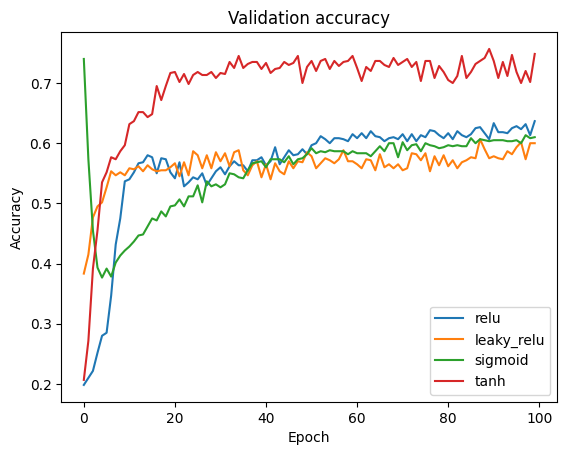

"\nYou've plotted both: loss and accuracy curves. It looks like sigmoid activation worked best for this particular model as the hidden layer's activation function. It led to a model with lower validation loss and higher accuracy after 100 epochs.\n"

In [22]:
# exercise 05

"""
Comparing activation functions II

What you coded in the previous exercise has been executed to obtain theactivation_results variable, this time 100 epochs were used instead of 20. This way you will have more epochs to further compare how the training evolves per activation function.

For every h_callback of each activation function in activation_results:

    The h_callback.history['val_loss'] has been extracted.
    The h_callback.history['val_accuracy'] has been extracted.

Both are saved into two dictionaries: val_loss_per_function and val_acc_per_function.

Pandas is also loaded as pd for you to use. Let's plot some quick validation loss and accuracy charts!
"""

# Instructions

"""

    Use pd.DataFrame()to create a new DataFrame from the val_loss_per_function dictionary.
    Call plot() on the DataFrame.
    Create another pandas DataFrame from val_acc_per_function.
    Once again, plot the DataFrame.

"""

# solution

# Create a dataframe from val_loss_per_function
val_loss= pd.DataFrame(val_loss_per_function)

# Call plot on the dataframe
val_loss.plot()
plt.title('Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Create a dataframe from val_acc_per_function
val_acc = pd.DataFrame(val_acc_per_function)

# Call plot on the dataframe
val_acc.plot()
plt.title('Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

#----------------------------------#

# Conclusion

"""
You've plotted both: loss and accuracy curves. It looks like sigmoid activation worked best for this particular model as the hidden layer's activation function. It led to a model with lower validation loss and higher accuracy after 100 epochs.
"""

In [23]:
# exercise 06

"""
Changing batch sizes

You've seen models are usually trained in batches of a fixed size. The smaller a batch size, the more weight updates per epoch, but at a cost of a more unstable gradient descent. Specially if the batch size is too small and it's not representative of the entire training set.

Let's see how different batch sizes affect the accuracy of a simple binary classification model that separates red from blue dots.

You'll use a batch size of one, updating the weights once per sample in your training set for each epoch. Then you will use the entire dataset, updating the weights only once per epoch.
"""

# Instructions

"""
Use get_model() to get a new, already compiled, model, then train your model for 5 epochs with a batch_size of 1.

Now train a new model with batch_size equal to the size of the training set.
"""

# solution

# Get a fresh new model with get_model
model = get_model('relu')

# Train your model for 5 epochs with a batch size of 1
model.fit(X_train, y_train, epochs=5, batch_size=1)
print("\n The accuracy when using a batch of size 1 is: ",
      model.evaluate(X_test, y_test)[1])

#----------------------------------#

model = get_model('relu')

# Fit your model for 5 epochs with a batch of size the training set
model.fit(X_train, y_train, epochs=5, batch_size=len(X_train))
print("\n The accuracy when using the whole training set as batch-size was: ",
      model.evaluate(X_test, y_test)[1])

#----------------------------------#

# Conclusion

"""
Great work! You can see that accuracy is lower when using a batch size equal to the training set size. This is not because the network had more trouble learning the optimization function: Even though the same number of epochs were used for both batch sizes the number of resulting weight updates was very different!. With a batch of size the training set and 5 epochs we only get 5 updates total, each update computes and averaged gradient descent with all the training set observations. To obtain similar results with this batch size we should increase the number of epochs so that more weight updates take place.
"""

Epoch 1/5
1400/1400 [==============================] - 5s 3ms/step - loss: 0.5888 - accuracy: 0.3350
Epoch 2/5
1400/1400 [==============================] - 4s 3ms/step - loss: 0.5008 - accuracy: 0.3871
Epoch 3/5
1400/1400 [==============================] - 3s 2ms/step - loss: 0.4414 - accuracy: 0.4543
Epoch 4/5
1400/1400 [==============================] - 3s 2ms/step - loss: 0.3987 - accuracy: 0.5336
Epoch 5/5
19/19 [==============================] - 0s 2ms/step - loss: 0.3565 - accuracy: 0.5800

 The accuracy when using a batch of size 1 is:  0.5799999833106995
Epoch 1/5
1/1 [==============================] - 1s 874ms/step - loss: 0.7728 - accuracy: 0.2671
Epoch 2/5
1/1 [==============================] - 0s 7ms/step - loss: 0.7674 - accuracy: 0.2521
Epoch 3/5
1/1 [==============================] - 0s 12ms/step - loss: 0.7623 - accuracy: 0.2743
Epoch 4/5
1/1 [==============================] - 0s 10ms/step - loss: 0.7572 - accuracy: 0.2779
Epoch 5/5
19/19 [==============================

'\nGreat work! You can see that accuracy is lower when using a batch size equal to the training set size. This is not because the network had more trouble learning the optimization function: Even though the same number of epochs were used for both batch sizes the number of resulting weight updates was very different!. With a batch of size the training set and 5 epochs we only get 5 updates total, each update computes and averaged gradient descent with all the training set observations. To obtain similar results with this batch size we should increase the number of epochs so that more weight updates take place.\n'

In [24]:
# exercise 07

"""
Batch normalizing a familiar model

Remember the digits dataset you trained in the first exercise of this chapter?

A multi-class classification problem that you solved using softmax and 10 neurons in your output layer.

You will now build a new deeper model consisting of 3 hidden layers of 50 neurons each, using batch normalization in between layers. The kernel_initializer parameter is used to initialize weights in a similar way.
"""

# Instructions

"""

    Import BatchNormalization from tensorflow.keras layers.
    Build your deep network model, use 50 neurons for each hidden layer adding batch normalization in between layers.
    Compile your model with stochastic gradient descent, sgd, as an optimizer.

"""

# solution

# Import batch normalization from keras layers
from tensorflow.keras.layers import BatchNormalization

# Build your deep network
batchnorm_model = Sequential()
batchnorm_model.add(Dense(50, input_shape=(64,), activation='relu', kernel_initializer='normal'))
batchnorm_model.add(BatchNormalization())
batchnorm_model.add(Dense(50, activation='relu', kernel_initializer='normal'))
batchnorm_model.add(BatchNormalization())
batchnorm_model.add(Dense(50, activation='relu', kernel_initializer='normal'))
batchnorm_model.add(BatchNormalization())
batchnorm_model.add(Dense(10, activation='softmax', kernel_initializer='normal'))

# Compile your model with sgd
batchnorm_model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

#----------------------------------#

# Conclusion

"""
Congratulations! That was a deep model indeed. Let's compare how it performs against this very same model without batch normalization!
"""

"\nCongratulations! That was a deep model indeed. Let's compare how it performs against this very same model without batch normalization!\n"

In [25]:
standard_model = Sequential()

standard_model.add(Dense(50, input_shape=(64,), activation='relu', kernel_initializer='normal'))
standard_model.add(Dense(50, activation='relu', kernel_initializer='normal'))
standard_model.add(Dense(50, activation='relu', kernel_initializer='normal'))
standard_model.add(Dense(10, activation='softmax', kernel_initializer='normal'))

standard_model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [26]:
def compare_histories_acc(h1,h2):
  plt.plot(h1.history['accuracy'])
  plt.plot(h1.history['val_accuracy'])
  plt.plot(h2.history['accuracy'])
  plt.plot(h2.history['val_accuracy'])
  plt.title("Batch Normalization Effects")
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Train', 'Test', 'Train with Batch Normalization', 'Test with Batch Normalization'], loc='best')
  plt.show()

In [27]:
X_train, X_test, y_train, y_test = tts(features, targets, test_size = 0.3)

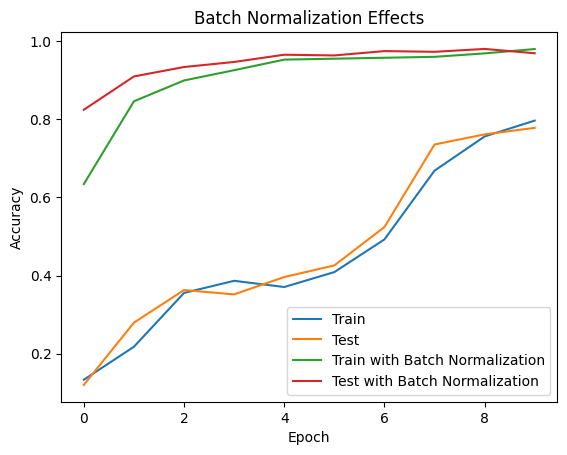

'\nOutstanding! You can see that for this deep model batch normalization proved to be useful, helping the model obtain high accuracy values just over the first 10 training epochs.\n'

In [28]:
# exercise 08

"""
Batch normalization effects

Batch normalization tends to increase the learning speed of our models and make their learning curves more stable. Let's see how two identical models with and without batch normalization compare.

The model you just built batchnorm_model is loaded for you to use. An exact copy of it without batch normalization: standard_model, is available as well. You can check their summary() in the console. X_train, y_train, X_test, and y_test are also loaded so that you can train both models.

You will compare the accuracy learning curves for both models plotting them with compare_histories_acc().

You can check the function pasting show_code(compare_histories_acc) in the console.
"""

# Instructions

"""
Train the standard_model for 10 epochs passing in train and validation data, storing its history in h1_callback.
Train your batchnorm_model for 10 epochs passing in train and validation data, storing its history in h2_callback.
Call compare_histories_acc passing in h1_callback and h2_callback.
"""

# solution

# Train your standard model, storing its history callback
h1_callback = standard_model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=10, verbose=0)

# Train the batch normalized model you recently built, store its history callback
h2_callback = batchnorm_model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=10, verbose=0)

# Call compare_histories_acc passing in both model histories
compare_histories_acc(h1_callback, h2_callback)

#----------------------------------#

# Conclusion

"""
Outstanding! You can see that for this deep model batch normalization proved to be useful, helping the model obtain high accuracy values just over the first 10 training epochs.
"""

In [29]:
from tensorflow.keras.optimizers import Adam

In [30]:
# exercise 09

"""
Preparing a model for tuning

Let's tune the hyperparameters of a binary classification model that does well classifying the breast cancer dataset.

You've seen that the first step to turn a model into a sklearn estimator is to build a function that creates it. The definition of this function is important since hyperparameter tuning is carried out by varying the arguments your function receives.

Build a simple create_model() function that receives both a learning rate and an activation function as arguments. The Adam optimizer has been imported as an object from tensorflow.keras.optimizers so that you can also change its learning rate parameter.
"""

# Instructions

"""

    Set the learning rate of the Adam optimizer object to the one passed in the arguments.
    Set the hidden layers activations to the one passed in the arguments.
    Pass the optimizer and the binary cross-entropy loss to the .compile() method.

"""

# solution

# Creates a model given an activation and learning rate
def create_model(learning_rate, activation):
  
  	# Create an Adam optimizer with the given learning rate
  	opt = Adam(learning_rate = learning_rate)
  	
  	# Create your binary classification model  
  	model = Sequential()
  	model.add(Dense(128, input_shape = (30,), activation = activation))
  	model.add(Dense(256, activation = activation))
  	model.add(Dense(1, activation = 'sigmoid'))
  	
  	# Compile your model with your optimizer, loss, and metrics
  	model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])
  	return model

#----------------------------------#

# Conclusion

"""
Well done! With this function ready you can now create a sklearn estimator and generate different models to perform simple hyperparameter tuning on!
"""

'\nWell done! With this function ready you can now create a sklearn estimator and generate different models to perform simple hyperparameter tuning on!\n'

In [33]:
# exercise 10

"""
Tuning the model parameters

It's time to try out different parameters on your model and see how well it performs!

The create_model() function you built in the previous exercise is ready for you to use.

Since fitting the RandomizedSearchCV object would take too long, the results you'd get are printed in the show_results() function. You could try random_search.fit(X,y) in the console yourself to check it does work after you have built everything else, but you will probably timeout the exercise (so copy your code first if you try this or you can lose your progress!).

You don't need to use the optional epochs and batch_size parameters when building your KerasClassifier object since you are passing them as params to the random search and this works already.
"""

# Instructions

"""

    Import KerasClassifier from tensorflow.keras scikit_learn wrappers.
    Use your create_model function when instantiating your KerasClassifier.
    Set 'relu' and 'tanh' as activation, 32, 128, and 256 as batch_size, 50, 100, and 200 epochs, and learning_rate of 0.1, 0.01, and 0.001.
    Pass your converted model and the chosen params as you build your RandomizedSearchCV object.

"""

# solution

# Import KerasClassifier from tensorflow.keras scikit learn wrappers
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV, KFold

# Create a KerasClassifier
model = KerasClassifier(build_fn = create_model)

# Define the parameters to try out
params = {'activation': ['relu', 'tanh'], 'batch_size': [32, 128, 256], 
          'epochs': [50, 100, 200], 'learning_rate': [0.1, 0.01, 0.001]}

# Create a randomize search cv object passing in the parameters to try
random_search = RandomizedSearchCV(model, param_distributions = params, cv = KFold(3))

# Running random_search.fit(X,y) would start the search,but it takes too long! 
show_results()

#----------------------------------#

# Conclusion

"""
That was great! Phew, I'm glad you didn't run random_search.fit(X,y),datacamp servers are still working. Now that we have a better idea of which parameters perform best, lets use them!
"""

/tmp/ipykernel_626642/519942213.py:33: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model)


NameError: name 'show_results' is not defined

In [34]:
cancer_data_path = '/home/nero/Documents/Estudos/DataCamp/Python/Extreme_Gradient_Boosting_with_XGBoost/datasets/breast_cancer_classification_data.csv'
data = pd.read_csv(cancer_data_path).drop(columns=['Unnamed: 32'])
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [35]:
y = data.diagnosis.replace({'M':1, 'B':0}).values
X = data.iloc[:, 2:]

X.shape, y.shape

((569, 30), (569,))

In [36]:
from sklearn.model_selection import cross_val_score

In [53]:
from tensorflow.keras.optimizers import SGD

In [58]:
def twoLayerFeedForward():
    clf = Sequential()
    clf.add(Dense(125, activation='relu', input_shape=(30,)))
    clf.add(Dense(256, activation='relu'))
    clf.add(Dense(1, activation='sigmoid'))
    clf.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=["accuracy"])
    return clf

In [59]:
# exercise 11

"""
Training with cross-validation

Time to train your model with the best parameters found: 0.001 for the learning rate, 50 epochs, a 128 batch_size and relu activations.

The create_model() function from the previous exercise is ready for you to use. X and y are loaded as features and labels.

Use the best values found for your model when creating your KerasClassifier object so that they are used when performing cross_validation.

End this chapter by training an awesome tuned model on the breast cancer dataset!
"""

# Instructions

"""

    Import KerasClassifier from tensorflow.keras scikit_learn wrappers.
    Create a KerasClassifier object providing the best parameters found.
    Pass your model, features and labels to cross_val_score to perform cross-validation with 3 folds.

"""

# solution

# Import KerasClassifier from tensorflow.keras wrappers
from scikeras.wrappers import KerasClassifier

# Create a KerasClassifier
model_wpr = KerasClassifier(twoLayerFeedForward, epochs = 50, batch_size = 128, verbose = 0)

# Calculate the accuracy score for each fold
kfolds = cross_val_score(model_wpr, X, y, cv = 3)

# Print the mean accuracy
print('The mean accuracy was:', kfolds.mean())

# Print the accuracy standard deviation
print('With a standard deviation of:', kfolds.std())

#----------------------------------#

# Conclusion

"""
Amazing! You can now test out different parameters on your networks and find the best models. Congratulations on making it this far, this chapter was quite a challengue! You're now left with a final chapter full of fun models to play with.
"""

The mean accuracy was: 0.9033045576905226
With a standard deviation of: 0.01409940803961522


"\nAmazing! You can now test out different parameters on your networks and find the best models. Congratulations on making it this far, this chapter was quite a challengue! You're now left with a final chapter full of fun models to play with.\n"